In [1]:
import random
import networkx as nx
import math
import itertools    
import matplotlib.pyplot as plt
import ast
import numpy as np

In [2]:
from global_variable import *

In [3]:
with open('sensornew.txt', 'r') as f:
    sensor = ast.literal_eval(f.read())

In [4]:
def calculate_Pdp_positions(length_of_grid,transmission_range):
    pdp_positions={}
    k=0
    for c_1 in np.arange(length_of_grid/(transmission_range*math.sqrt(2))):
        for c_2 in np.arange(length_of_grid/(transmission_range*math.sqrt(2))):
            pdp_positions[k]=(c_1*transmission_range*math.sqrt(2),c_2*transmission_range*math.sqrt(2))
            k=k+1
    return pdp_positions

In [5]:
pdp_positions=calculate_Pdp_positions(length_of_grid,transmission_range)

In [6]:
def distance(points,i,j):
    x=points[i][0]-points[j][0]
    y=points[i][1]-points[j][1]
    return math.sqrt(x*x+y*y)

In [7]:
def create_trip_graph():
    G=nx.Graph()
    distance_between_pdp={}
    k=0
    for i in range(len(pdp_positions)):
        G.add_node('pdp{}'.format(i),pos=pdp_positions[i])
    for u in range(len(pdp_positions)):
        for v in range(len(pdp_positions)):
            wt=distance(pdp_positions,u,v)
            G.add_edge('pdp{}'.format(u),'pdp{}'.format(v),weight=wt)
            distance_between_pdp[(u,v)]=wt
            k=k+1
    return G,distance_between_pdp

In [8]:
trip_graph,distance_between_pdp=create_trip_graph()

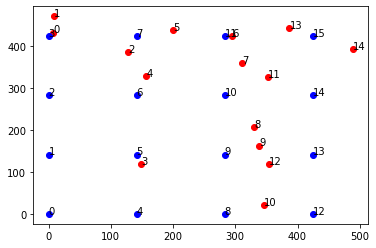

In [9]:
for i in range(len(sensor)):
    plt.scatter(sensor[i][0],sensor[i][1],c='r')
    plt.annotate(i,(sensor[i][0],sensor[i][1]))
for j in range(len(pdp_positions)):
    plt.scatter(pdp_positions[j][0],pdp_positions[j][1],c='b')
    plt.annotate(j,(pdp_positions[j][0],pdp_positions[j][1]))

In [10]:
def threshold_distance_inside_sensor_range():
    trs=(data_stored/bandwidth)*drone_speed
    return trs

In [71]:
Dmov=[]


In [72]:
def check_euclid(init,final,sensor,Dmov):
    """function to check whether the sensor can send data while drone is moving"""
    sensor1=sensor
    dsubset=[]
    p1=np.array(pdp_positions[init])
    p2=np.array(pdp_positions[final])
    for i in range(len(sensor1)):
        p3=np.array(sensor1[i])
        d=np.cross(p2-p1,p3-p1)/np.linalg.norm(p2-p1)
        print(d)
        dsi=2*(math.sqrt(abs(transmission_range**2-d**2)))
        print(dsi)
        if dsi>=threshold_distance_inside_sensor_range():
            if i not in Dmov:
                dsubset.append(i)
        
    Dmov=Dmov+list(check_overlapping(init,final,dsubset))
    return Dmov


In [73]:
def check_overlapping(pdp_init,pdp_final,dsubset,sensor=sensor,radius=transmission_range):
    """function to check the overlapping sensor"""
    l={}
    distance_of_line_connecting_two_pdp=distance_between_pdp[pdp_init,pdp_final]
    #compute direction vector of line connecting two pdp
    Dx=(pdp_positions[pdp_final][0]-pdp_positions[pdp_init][0])/distance_of_line_connecting_two_pdp
    print(Dx)
    Dy=(pdp_positions[pdp_final][1]-pdp_positions[pdp_init][1])/distance_of_line_connecting_two_pdp
    print(Dy)
    for i in dsubset :
        
        t=Dx*(sensor[i][0]-pdp_positions[pdp_init][0])+Dy*(sensor[i][1]-pdp_positions[pdp_init][1])
        Ex=t*Dx+pdp_positions[pdp_init][0]
        Ey=t*Dy+pdp_positions[pdp_init][1]
        LEC=math.sqrt((Ex-sensor[i][0])**2+(Ey-sensor[i][1])**2)
        if(LEC)<radius:
            dt=math.sqrt(radius**2-LEC**2)
            #calculate the first intersection point
            Fx=(t-dt)*Dx+pdp_positions[pdp_init][0]
            Fy=(t-dt)*Dy+pdp_positions[pdp_init][1]
            #calculate the second intersection point
            Gx=(t+dt)*Dx+pdp_positions[pdp_init][0]
            Gy=(t+dt)*Dx+pdp_positions[pdp_init][1]
            l[i]=(Fx,Fy),(Gx,Gy)
        print(l)    
    return(l)

In [76]:
Dmov=check_euclid(0,10,sensor,Dmov)

300.5203820042827
566.7892024377317
327.3904396893715
623.4885724694559
182.43354954612926
305.16880574527926
-21.213203435596423
195.44820285692063
121.62236636408616
138.4485463990142
168.99852070358486
272.4738519564767
91.21677477306464
81.96340646898464
33.941125496954264
188.12761626087757
-86.97413408594534
98.701570402907
-123.74368670764584
145.7737973711326
-229.1025971044414
412.2523499023383
-18.38477631085025
196.59094587493087
-166.17009357883865
265.4241887997399
38.89087296526013
184.25525772688277
-68.58935777509512
145.54037240573487
0.7071067811865476
0.7071067811865476
{}
{}
{}
{3: ((64.89862519457375, 64.89862519457375), (203.1013748054263, 203.1013748054263))}
{3: ((64.89862519457375, 64.89862519457375), (203.1013748054263, 203.1013748054263))}
{3: ((64.89862519457375, 64.89862519457375), (203.1013748054263, 203.1013748054263))}
{3: ((64.89862519457375, 64.89862519457375), (203.1013748054263, 203.1013748054263)), 6: ((330.52155973831583, 330.52155973831583), (388.

In [77]:
dsubset

[3, 6, 7, 8, 11, 13, 14]

In [78]:
Dmov

[3, 6, 7, 8, 11, 13, 14]